In [38]:
import oda_api.token 
import logging
import numpy as np
from oda_api.api import DispatcherAPI
from oda_api.plot_tools import OdaImage, OdaLightCurve, OdaSpectrum
import matplotlib.pyplot as plt
import astroquery.heasarc
from astropy.wcs import WCS
from astropy.io import fits
from astroquery.simbad import Simbad
from astropy import coordinates as coord
from astropy.coordinates import SkyCoord
from astropy.time import Time

In [13]:
# token = ''
# token = getpass.getpass('Insert the token')
token = oda_api.token.discover_token() # get token stored locally

In [14]:
logging.getLogger().setLevel(logging.INFO) # WARNING, INFO or DEBUG
logging.getLogger('oda_api').addHandler(logging.StreamHandler())

In [ ]:
source_name = 'Crab'

Heasarc = astroquery.heasarc.Heasarc()

def get_scw_list(ra_obj, dec_obj, radius):
    R = Heasarc.query_region(
            position = SkyCoord(ra_obj, dec_obj, unit='deg'),
            radius = f"{radius} deg",
            catalog = 'intscw',
            good_isgri = ">1000",
        )
    R.sort('scw_id') 
    return R['scw_id'], R['scw_ver'], R['start_date'], R['end_date']

assert astroquery.__version__ >= '0.4.2.dev6611'
assert 'isdc' in astroquery.heasarc.Conf.server.cfgtype

result_table = Simbad.query_object(source_name)
source_coord = coord.SkyCoord(result_table['ra'][0], result_table['dec'][0], unit=("hourangle", "deg"))
ra=source_coord.ra.deg
dec=source_coord.dec.deg
radius=8.

scwlist,version,start,end = get_scw_list(ra,dec,radius)

In [51]:
scw = [(s+"."+v).strip() for s,v in zip(scwlist,version)]
pick = np.random.randint(0,len(scw))
scw_pick = scw[pick]

In [ ]:
disp = DispatcherAPI(url="https://www.astro.unige.ch/mmoda/dispatch-data", instrument="mock")

if Time(start[pick], format='mjd').isot > '2016':
    osa_version = "OSA11.2"
else:
    osa_version = "OSA10.2"

par_dict = {
"E1_keV": "15",
"E2_keV": "30",
"T_format": "isot",
"detection_threshold": "5",
"instrument": "isgri",
"osa_version": osa_version,
"product": "isgri_image",
"product_type": "Real",
"scw_list": scw_pick,
'token': token
}

data_collection = disp.get_product(**par_dict)
data_collection.show()

please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation: https://oda-api.readthedocs.io/en/latest/user_guide/ScienceWindowList.html?highlight=logging#Let's-get-some-logging . 
To disable this message you can pass `.get_product(..., silent=True)`
- waiting for remote response (since 2025-03-10 13:16:06), please wait for https://www.astro.unige.ch/mmoda/dispatch-data/run_analysis


IMAGE

In [33]:
data_collection.mosaic_image_0_mosaic.show()
print(data_collection.mosaic_image_0_mosaic.show_meta())

------------------------------
name: mosaic_image
meta_data dict_keys(['product', 'instrument', 'src_name', 'query_parameters'])
number of data units 6
------------------------------
data uniti 0 ,name: PRIMARY
data uniti 1 ,name: GROUPING
data uniti 2 ,name: ISGR-MOSA-IMA
data uniti 3 ,name: ISGR-MOSA-IMA
data uniti 4 ,name: ISGR-MOSA-IMA
data uniti 5 ,name: ISGR-MOSA-IMA
------------------------------
product : mosaic
instrument : isgri
src_name : 
query_parameters : None
------------------------------
None


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 58823.491481 from DATE-OBS.
Set MJD-END to 58823.519826 from DATE-END'. [astropy.wcs.wcs]
/home/hthums/micromamba/envs/jupiter_xray/lib/python3.9/site-packages/oda_api/plot_tools.py:219: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  self.smin = Slider(cmin, 'Min', data_min, data_max, valinit=1., orientation='vertical')
/home/hthums/micromamba/envs/jupiter_xray/lib/python3.9/site-packages/oda_api/plot_tools.py:220: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  self.smax = Slider(cmax, 'Max', data_min, data_max, valinit=10., orientation='vertical')
/home/hthums/micromamba/envs/jupiter_xray/lib/python3.9/site-packages/oda_api/plot_tools.py:101: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


'./Crab-216800040010.001mosaic.fits'

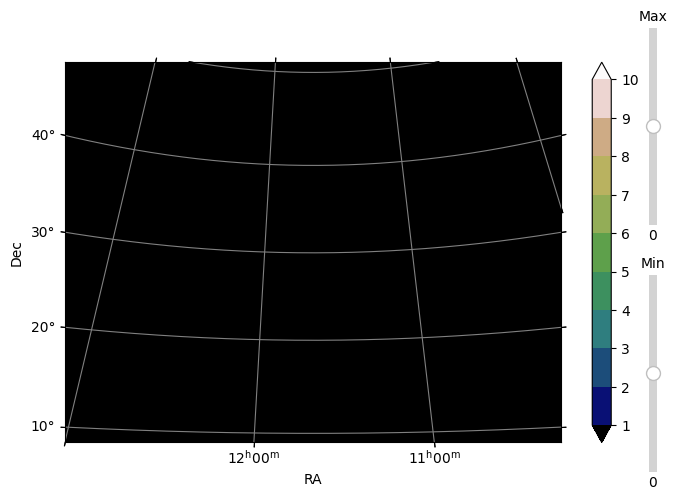

In [ ]:
im=OdaImage(data_collection)
_ = im.show()
im.write_fits(f"../data/Crab-{scw_pick}")

Plot from the fits file.

Filename: ../data/Crab-216800040010.001mosaic.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  GROUPING      1 BinTableHDU     82   4R x 16C   [8A, 32A, 1J, 1J, 256A, 3A, 32A, 1I, 1I, 1E, 1E, 1E, 1D, 1D, 1D, 1D]   
  2  ISGR-MOSA-IMA    1 ImageHDU        67   (535, 535)   float32   
  3  ISGR-MOSA-IMA    2 ImageHDU        67   (535, 535)   float32   
  4  ISGR-MOSA-IMA    3 ImageHDU        67   (535, 535)   float32   
  5  ISGR-MOSA-IMA    4 ImageHDU        67   (535, 535)   float32   


XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  535                                                  
NAXIS2  =                  535                                                  
PCOUNT  =                   

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 58823.491481 from DATE-OBS.
Set MJD-END to 58823.519826 from DATE-END'. [astropy.wcs.wcs]
/tmp/ipykernel_12181/2997651373.py:24: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(image_data), cmap='plasma', origin='lower')


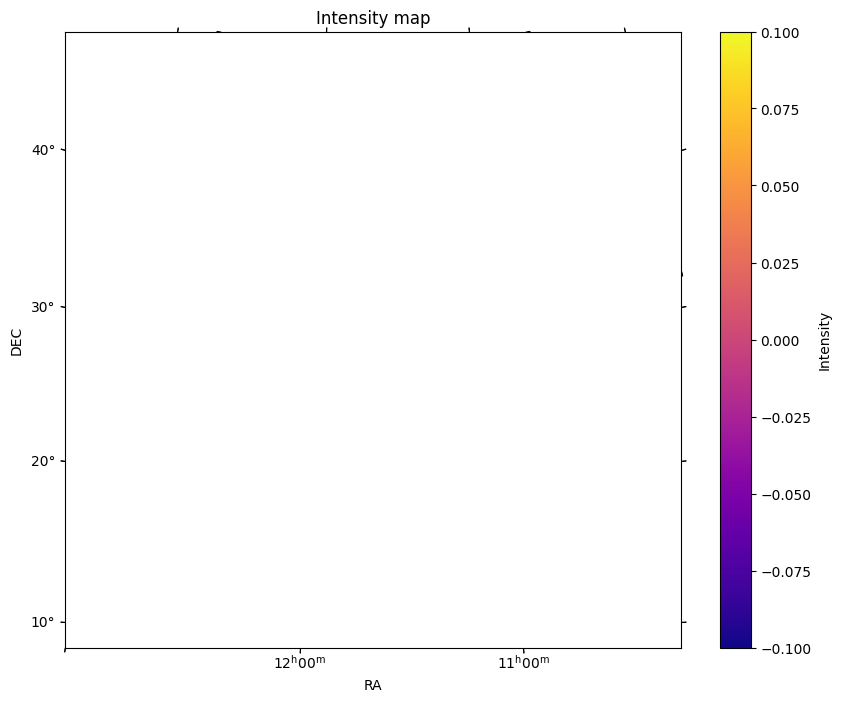

In [46]:
fits_file = f"../data/Crab-{scw_pick}"+"mosaic.fits"

pick = 2  # 2 for image, 3 for variance, 4 for significance and 5 for exposure map

with fits.open(fits_file) as hdul:
    hdul.info()
    intensity_data = hdul[2].data 
    variance_data = hdul[3].data
    significance_data = hdul[4].data
    exposure_data = hdul[5].data
    print("\n")
    print(repr(hdul[pick].header))
    print("\n")
    print(hdul[1].data.columns)
    wcs = WCS(hdul[pick].header)  
    CD1 = np.abs(hdul[pick].header["CD1_1"])

data = [intensity_data, variance_data, significance_data, exposure_data]
image_data = data[pick-2]


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=wcs)
im = ax.imshow(np.log10(image_data), cmap='plasma', origin='lower')

ax.set_xlabel('RA')
ax.set_ylabel('DEC')


title = ""
if pick == 2:
    title = "Intensity"
elif pick == 3:
    title = "Variance"
elif pick == 4:
    title = "Significance"
elif pick == 5:
    title = "Exposure"

plt.title(title+" map")
plt.colorbar(im, label="Intensity")

#plt.savefig(f"{scw_list[list_position]}"+"_"+f"{title}.pdf", format='pdf', bbox_inches='tight')

Countrate to flux conversion (method of E. Jourdain using ISGRI calibration).

Analytically calculated photon flux: 0.2501898870399915 ph/cm2/s
Numerically calculated photon flux: 0.2502236796064092 ph/cm2/s
Numerically calculated energy flux: 8.296223349642631e-09 erg/cm2/s
Flux per count = energy per photon: 3.315522880445298e-08 erg/photon

To convert countrate to flux, multiply countrate by flux per count


Text(0, 0.5, 'Flux ($ph.cm^{-2}.s^{-1}/keV$)')

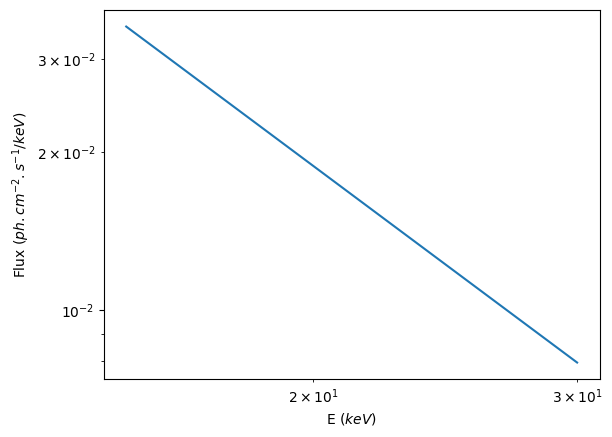

In [11]:
E0 = 100 # 100 keV reference energy
K = 6.2e-4 # flux @ 100 keV (photons/cm2/s), roughly the same for each instrument
E = np.linspace(15, 30)
gamma = 2.12 # photon index of ISGRI (2.105 for SPI+ISGRI+JEM-X)

power_law = K * (E/E0)**(-gamma) # flux

conv_factor = - K * (E0)**(gamma) / (gamma-1) * ((30)**(1-gamma) - (15)**(1-gamma)) # analytic
conv_factor_num = np.trapz(power_law, E) # numeric
conv_factor_num_erg = np.trapz(power_law*E*1.60218e-9, E) # numeric

print(f'Analytically calculated photon flux: {conv_factor} ph/cm2/s')
print(f'Numerically calculated photon flux: {conv_factor_num} ph/cm2/s')
print(f'Numerically calculated energy flux: {conv_factor_num_erg} erg/cm2/s')
print(f'Flux per count = energy per photon: {conv_factor_num_erg/conv_factor_num} erg/photon')
print('\nTo convert countrate to flux, multiply countrate by flux per count')

plt.figure()
plt.loglog(E, power_law)
plt.xlabel('E ($keV$)')
plt.ylabel('Flux ($ph.cm^{-2}.s^{-1}/keV$)')